<a href="https://colab.research.google.com/github/Javaled/Desafio01_AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [47]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [34]:
import matplotlib.pyplot as plt

#Análisis de Datos

##1. Análisis de facturación



💰 Total de ventas en Tienda 1: $1,150,880,400.00
💰 Total de ventas en Tienda 2: $1,116,343,500.00
💰 Total de ventas en Tienda 3: $1,098,019,600.00
💰 Total de ventas en Tienda 4: $1,038,375,700.00


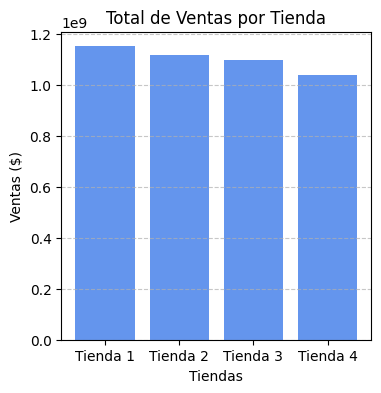

In [79]:
# Función para calcular el total de ventas de una tienda
def calculo_total(tienda):
    return sum(float(precio) for precio in tienda['Precio'])

# Lista de tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tienda = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Función para mostrar el total de ventas por tienda y graficar
def mostrar_resultados_total_por_tienda():
    totales = []

    for i, tienda in enumerate(tiendas):
        total = calculo_total(tienda)
        totales.append(total)
        print(f'💰 Total de ventas en {nombres_tienda[i]}: ${total:,.2f}')

    # Crear gráfico de barras con valores
    plt.figure(figsize=(4, 4))
    plt.bar(nombres_tienda, totales, color='cornflowerblue')
    plt.title('Total de Ventas por Tienda')
    plt.xlabel('Tiendas')
    plt.ylabel('Ventas ($)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Llamada a la función
mostrar_resultados_total_por_tienda()

## 2. Ventas por categoría

In [101]:
# Función para calcular el número de ventas por categoría de una tienda
def contar_ventas_por_categoria(df):
    ventas_por_categoria = {}

    for i in range(len(df)):
        categoria = df['Categoría del Producto'][i]

        if categoria in ventas_por_categoria:
            ventas_por_categoria[categoria] += 1
        else:
            ventas_por_categoria[categoria] = 1

    return ventas_por_categoria

#Mostrar resultados y gráficos de barras
def mostrar_ventas_categoria_total_por_tienda():
    for i, tienda in enumerate(tiendas):
        total = contar_ventas_por_categoria(tienda)
        nombre_tienda = nombres_tienda[i]

        # Imprimir los resultados
        print(f'📊 Total de ventas en {nombre_tienda}:')
        for categoria, monto in total.items():
            print(f'  - {categoria}: {monto}')

# Llamada a la función
mostrar_ventas_categoria_total_por_tienda()

📊 Total de ventas en Tienda 1:
  - Electrónicos: 448
  - Muebles: 465
  - Juguetes: 324
  - Electrodomésticos: 312
  - Artículos para el hogar: 171
  - Deportes y diversión: 284
  - Libros: 173
  - Instrumentos musicales: 182
📊 Total de ventas en Tienda 2:
  - Muebles: 442
  - Instrumentos musicales: 224
  - Deportes y diversión: 275
  - Electrónicos: 422
  - Artículos para el hogar: 181
  - Juguetes: 313
  - Electrodomésticos: 305
  - Libros: 197
📊 Total de ventas en Tienda 3:
  - Electrodomésticos: 278
  - Muebles: 499
  - Instrumentos musicales: 177
  - Deportes y diversión: 277
  - Electrónicos: 451
  - Juguetes: 315
  - Artículos para el hogar: 177
  - Libros: 185
📊 Total de ventas en Tienda 4:
  - Electrodomésticos: 254
  - Muebles: 480
  - Deportes y diversión: 277
  - Libros: 187
  - Electrónicos: 451
  - Instrumentos musicales: 170
  - Juguetes: 338
  - Artículos para el hogar: 201


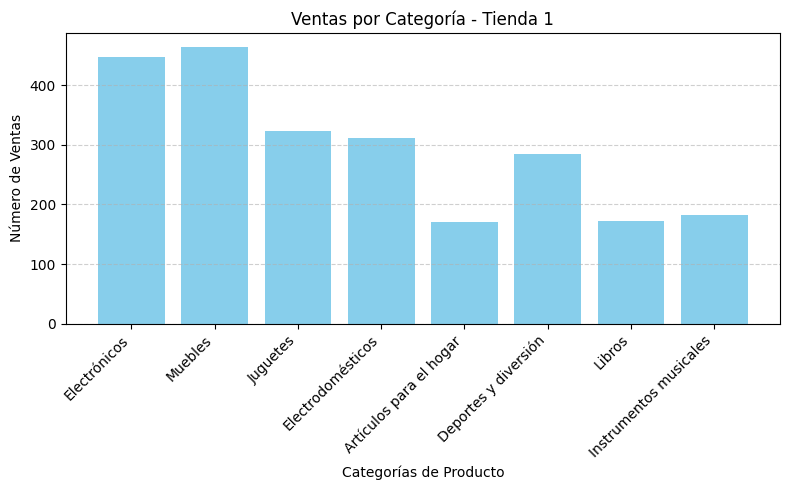

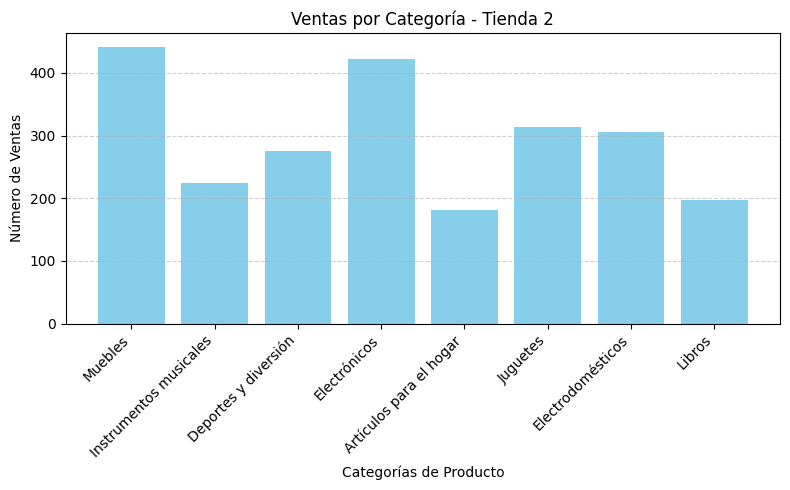

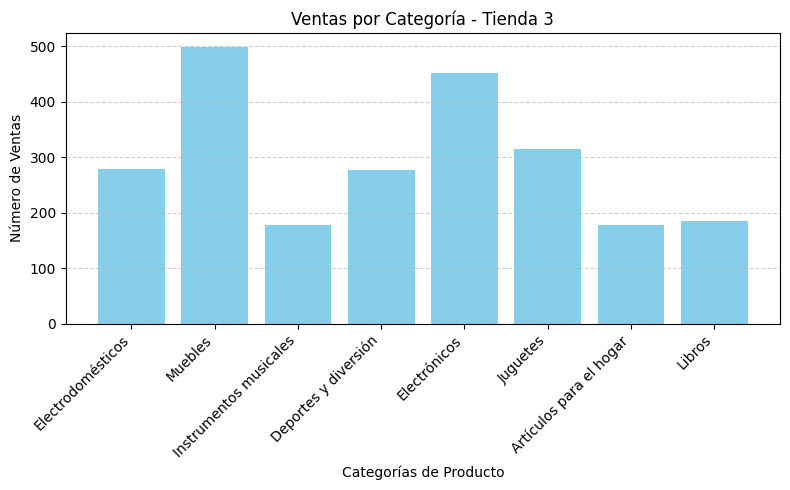

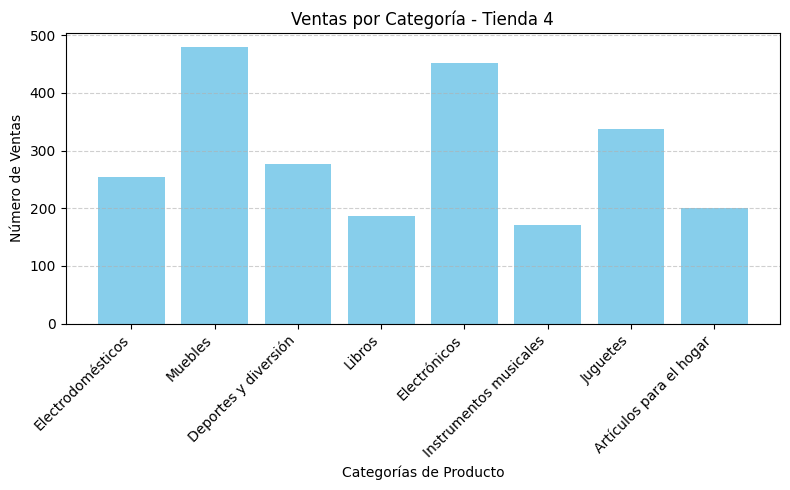

In [107]:
#Mostrar resultados y gráficos de barras
def grafico_ventas_categoria_total_por_tienda():
    for i, tienda in enumerate(tiendas):
        total = contar_ventas_por_categoria(tienda)
        nombre_tienda = nombres_tienda[i]

        # Datos para el gráfico de barras
        categorias = list(total.keys())
        ventas = list(total.values())

        # Crear gráfico de barras
        plt.figure(figsize=(8, 5))
        plt.bar(categorias, ventas, color='skyblue')
        plt.title(f'Ventas por Categoría - {nombre_tienda}')
        plt.xlabel('Categorías de Producto')
        plt.ylabel('Número de Ventas')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.show()

# Llamada a la función
grafico_ventas_categoria_total_por_tienda()

## 3. Calificación promedio de la tienda


In [29]:
# Función para calcular la calificación promedio de una tienda
def calcular_calificacion_media(store):
    total = sum(float(calificacion) for calificacion in store['Calificación'])
    promedio = total / len(store['Calificación'])
    return round(promedio, 2)

# Función para mostrar la calificación promedio por tienda
def mostrar_calificacion_total_por_tienda():
    for i, tienda in enumerate(tiendas):
        total = calcular_calificacion_media(tienda)
        print(f'⭐️ Calificación promedio en {nombres_tienda[i]}: {round(total, 2)}')

# Llamada a la función
mostrar_calificacion_total_por_tienda()

⭐️ Calificación promedio en Tienda 1: 3.98
⭐️ Calificación promedio en Tienda 2: 4.04
⭐️ Calificación promedio en Tienda 3: 4.05
⭐️ Calificación promedio en Tienda 4: 4.0


## 4. Productos más y menos vendidos

---




📊 Tienda 1:
  📈 Producto más vendido: Microondas (60 ventas)
  📉 Producto menos vendido: Auriculares con micrófono (33 ventas)


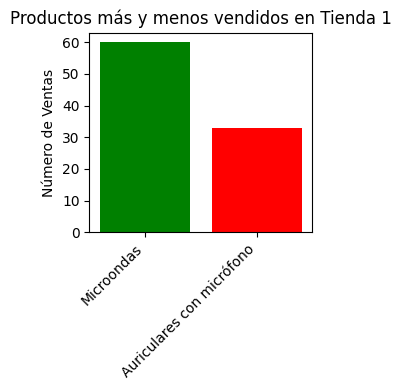


📊 Tienda 2:
  📈 Producto más vendido: Iniciando en programación (65 ventas)
  📉 Producto menos vendido: Juego de mesa (32 ventas)


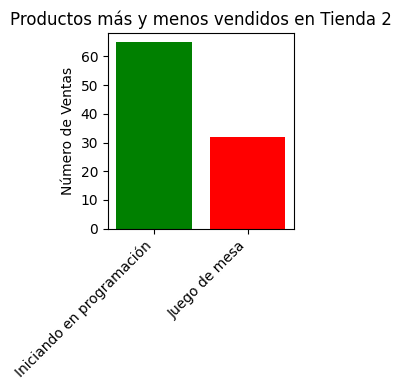


📊 Tienda 3:
  📈 Producto más vendido: Kit de bancas (57 ventas)
  📉 Producto menos vendido: Bloques de construcción (35 ventas)


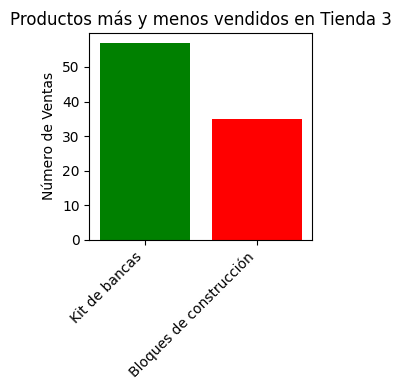


📊 Tienda 4:
  📈 Producto más vendido: Cama box (62 ventas)
  📉 Producto menos vendido: Guitarra eléctrica (33 ventas)


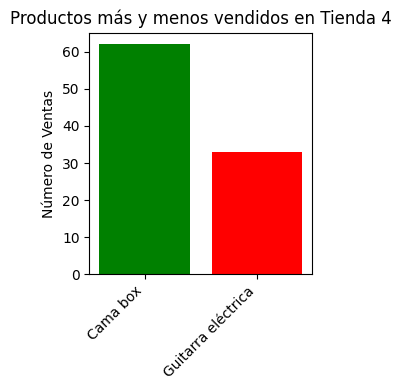

In [119]:
def producto_mas_menos_vendido(df):
    conteo_productos = {}

    # Contamos cuántas veces aparece cada producto en la tienda
    for producto in df['Producto']:
        if producto in conteo_productos:
            conteo_productos[producto] += 1
        else:
            conteo_productos[producto] = 1

    # Encontramos el producto más vendido (más veces aparece)
    mas_vendido = max(conteo_productos, key=conteo_productos.get)
    menos_vendido = min(conteo_productos, key=conteo_productos.get)

    return mas_vendido, conteo_productos[mas_vendido], menos_vendido, conteo_productos[menos_vendido]

# Función para imprimir el resultado por cada tienda y graficar
def mostrar_resultados_por_tienda():

    for i, tienda in enumerate(tiendas):
        mas, ventas_mas, menos, ventas_menos = producto_mas_menos_vendido(tienda)
        nombre_tienda = nombres_tienda[i]

        # Imprimir los resultados
        print(f'\n📊 {nombre_tienda}:')
        print(f'  📈 Producto más vendido: {mas} ({ventas_mas} ventas)')
        print(f'  📉 Producto menos vendido: {menos} ({ventas_menos} ventas)')

        # Crear gráfico de barras para los productos más y menos vendidos
        plt.figure(figsize=(3, 4))
        productos = [mas, menos]
        ventas = [ventas_mas, ventas_menos]

        plt.bar(productos, ventas, color=['green', 'red'])
        plt.title(f'Productos más y menos vendidos en {nombre_tienda}')
        plt.ylabel('Número de Ventas')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Llamada a la función para mostrar los resultados y gráficos
mostrar_resultados_por_tienda()

## 5. Envío promedio por tienda

In [120]:
# Función para calcular el costo de envío promedio de una tienda
def calculo_envio_total(tienda):
    total = sum(float(precio) for precio in tienda['Costo de envío'])
    return total / len(tienda['Costo de envío'])

# Función para mostrar el total de ventas por tienda
def mostrar_promedio_envio_por_tienda():
    for i, tienda in enumerate(tiendas):
        total = calculo_envio_total(tienda)
        print(f'💸 Promedio costo de envío en {nombres_tienda[i]}: ${total:,.2f}')

# Llamada a la función
mostrar_promedio_envio_por_tienda()

💸 Promedio costo de envío en Tienda 1: $26,018.61
💸 Promedio costo de envío en Tienda 2: $25,216.24
💸 Promedio costo de envío en Tienda 3: $24,805.68
💸 Promedio costo de envío en Tienda 4: $23,459.46


#Informe Final

##1. Introducción

  En este análisis se evaluará el desempeño de cuatro tiendas tomando en cuenta aspectos clave como el total de ventas, la cantidad de productos vendidos por categoría, la calificación promedio de los artículos y el costo promedio de envío. El objetivo es identificar cuál de ellas está teniendo un rendimiento más bajo para considerar su posible venta.

##2. Análisis de Datos

###¿Cuál tienda tiene el mejor desempeño?📈


* 💰 Ventas sólidas: $1,098M (cercana a Tienda 1 y 2).

* ⭐️ Mayor calificación promedio: 4.05, lo que sugiere mejor satisfacción del cliente.

* 💸 Costo de envío competitivo: $24,805, balance entre eficiencia y valor.

* 🧸 Producto más vendido atractivo: Kit de bancas, un artículo de alto volumen.

###¿Cuál tienda tiene el peor desempeño?📉


La Tienda 4 muestra el rendimiento más bajo en varios aspectos:

* 💰 Menor total de ventas: $1,038,375,700 (la más baja entre las cuatro).

* ⭐️ Calificación promedio: 4.0, solo por encima de Tienda 1, pero inferior a Tienda 2 (4.04) y Tienda 3 (4.05).

* 💸 Costo de envío promedio más bajo: $23,459.46. Aunque esto suena bien, también puede indicar márgenes más bajos.

* 🧸 Producto menos vendido: Guitarra eléctrica (33 ventas), que empata con Tienda 1, pero tiene menor diversidad general.

###¿Cuál tienda debería venderse?📤

Tienda 4 sería la candidata más razonable para vender.

###Criterios utilizados✅

* **Menor facturación general →** Es la que genera menos ingresos.

* **Menor calificación comparada con las tiendas top →** Puede haber menor satisfacción del cliente.

* **Costo de envío bajo →** Puede reflejar menor inversión logística o márgenes más ajustados.

* **Ventas por categoría no son destacables →** Aunque mantiene buenas cifras, no lidera en ninguna categoría.

##3. Conclusión

La Tienda 4 presenta algunas debilidades notables: sus ventas totales son las más bajas entre las tiendas, con solo $1,038,375,700.00 en ventas. Aunque tiene una calificación promedio de 4.0, no es la mejor, lo que sugiere que la satisfacción del cliente podría mejorar. Además, aunque el costo de envío es el más bajo, esto podría reflejar márgenes de beneficio más reducidos. La tienda también enfrenta un desafío con productos menos vendidos, como la guitarra eléctrica, lo que indica falta de demanda en ciertos segmentos. Sin una mejora en estos aspectos, el rendimiento de la tienda podría seguir siendo limitado.